Importaciones

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cargar datos de accidentalidad

In [24]:
# Cargar datos
datosAccidentalidad = pd.read_csv("https://raw.githubusercontent.com/Dltr17/AccidentalidadVial2017-2021/main/datos/datos.csv")

In [43]:
# Lista de años deseados
años_deseados = [2017, 2018, 2019, 2020, 2021]

# Filtrar datos para mantener solo los años deseados
datosAccidentalidad = datosAccidentalidad[datosAccidentalidad['Año'].isin(años_deseados)]

Exploracion de datos

In [60]:
print("Exloracion datos accidentes")
print(datosAccidentalidad.info())

Exloracion datos accidentes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18182 entries, 0 to 18552
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Índice             18182 non-null  int64 
 1   Año                18182 non-null  int64 
 2   NumMes             18182 non-null  int64 
 3   Día                18182 non-null  int64 
 4   NomDepartamento    18182 non-null  object
 5   NomClaseAccidente  18182 non-null  object
 6   NomCausaAcc        17550 non-null  object
 7   NomGeometriaAcc    18182 non-null  object
 8   terreno            18182 non-null  object
 9   secc_tip           18182 non-null  object
 10  n_muertos          18182 non-null  int64 
 11  n_heridos          18182 non-null  int64 
 12  Festividad         18182 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 2.4+ MB
None


In [61]:
datosAccidentalidad.head()

,Índice,Año,NumMes,Día,NomDepartamento,NomClaseAccidente,NomCausaAcc,NomGeometriaAcc,terreno,secc_tip,n_muertos,n_heridos,Festividad
0,1,2017,12,10,Boyacá,Choque,Sin causa especifica,Recta,Plano,Terraplen,0,2,0
1,2,2017,12,25,Antioquia,Choque,Sin causa especifica,Curva Derecha,Ondulado,Media Ladera Derecha,0,0,0
2,3,2018,4,19,Boyacá,Volcamiento,Sin causa especifica,Curva Derecha,Plano,Terraplen,0,0,0
3,4,2017,9,26,Antioquia,Choque,Sin causa especifica,Recta,Montañoso,Media ladera Izquierda,0,1,0
4,5,2017,2,10,Antioquia,Atropello,Sin causa especifica,Recta,Plano,Media ladera Izquierda,0,2,0


In [62]:
datosAccidentalidad.describe().T

,count,mean,std,min,25%,50%,75%,max
Índice,18182.0,9273.841712,5339.650761,1.0,4673.25,9262.5,13888.5,18553.0
Año,18182.0,2018.620009,1.370075,2017.0,2017.00,2019.0,2020.0,2021.0
NumMes,18182.0,6.483115,3.547910,1.0,3.00,7.0,10.0,12.0
Día,18182.0,15.396271,8.684807,1.0,8.00,15.0,23.0,31.0
n_muertos,18182.0,0.108679,0.373718,0.0,0.00,0.0,0.0,9.0
n_heridos,18182.0,0.597184,1.288865,0.0,0.00,0.0,1.0,35.0
Festividad,18182.0,0.068474,0.252565,0.0,0.00,0.0,0.0,1.0


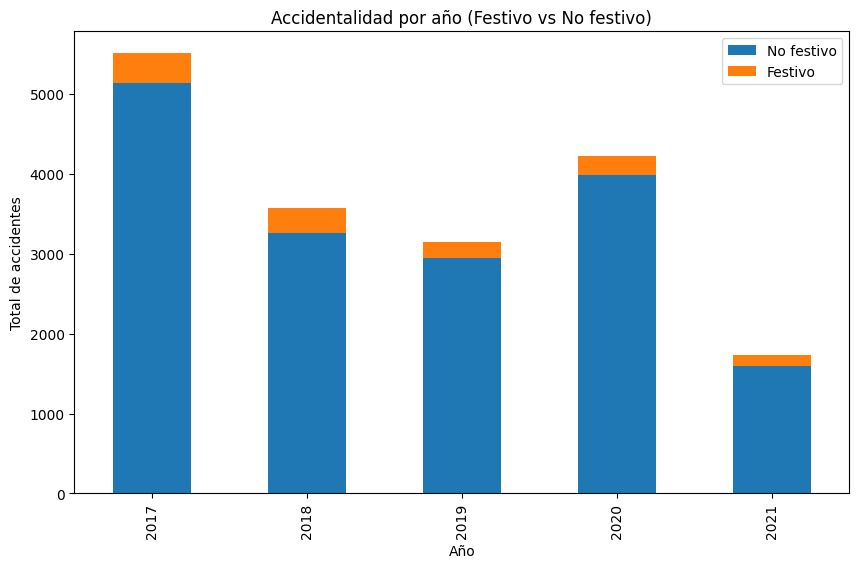

In [49]:
# Agrupar los datos por año y tipo de día (festivo o no festivo)
accidentalidad_por_año = datosAccidentalidad.groupby(['Año', 'Festividad']).size().unstack()

# Graficar los totales por año
accidentalidad_por_año.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Accidentalidad por año (Festivo vs No festivo)')
plt.xlabel('Año')
plt.ylabel('Total de accidentes')
plt.legend(['No festivo', 'Festivo'])
plt.show()

Comportamiento por año

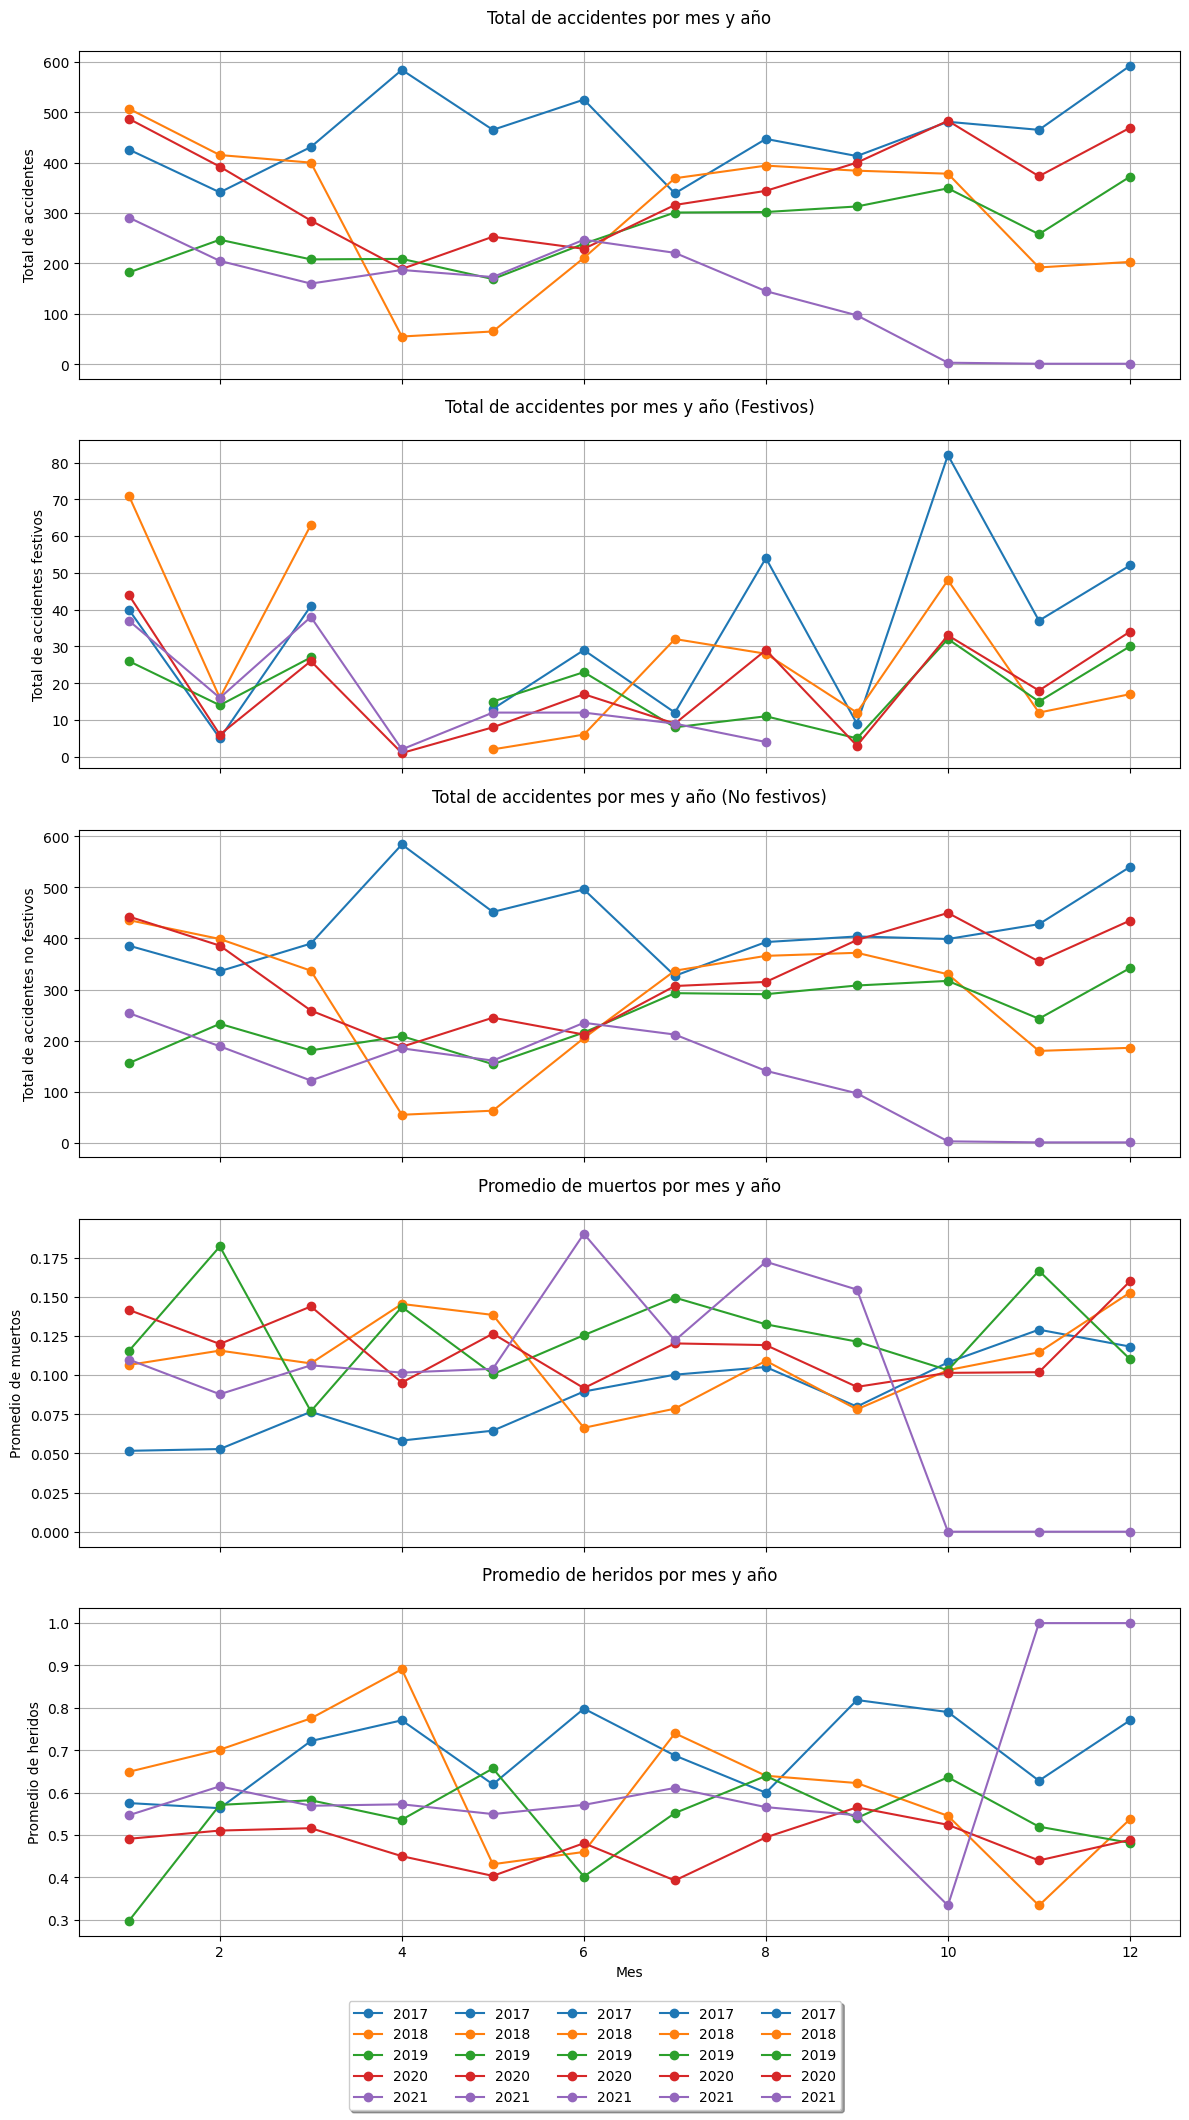

In [56]:
# Agrupar los datos por año y mes
datos_grouped = datosAccidentalidad.groupby(['Año', 'NumMes'])

# Crear la figura y los subplots
fig, axs = plt.subplots(5, 1, figsize=(12, 20), sharex=True)

# Configuración de la leyenda
handles, labels = [], []
for ax in axs:
    ax.set_title(ax.get_title(), pad=20)  # Aumentar el espacio entre el título y la gráfica
    ax.legend(loc='upper left', bbox_to_anchor=(0, -0.3), fancybox=True, shadow=True, ncol=5)
    ax.get_legend().remove()  # Quitar la leyenda por defecto
    handles_, labels_ = ax.get_legend_handles_labels()
    handles.extend(handles_)
    labels.extend(labels_)

# Añadir una leyenda general antes de las gráficas
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=5)

# Total de accidentes por mes y año
accidentes_total = datos_grouped.size().unstack(level=0)
accidentes_total.plot(ax=axs[0], kind='line', marker='o')
axs[0].set_title('Total de accidentes por mes y año')
axs[0].set_ylabel('Total de accidentes')

# Total de accidentes por mes y año, festivos
accidentes_festivos = datosAccidentalidad[datosAccidentalidad['Festividad'] == 1].groupby(['Año', 'NumMes']).size().unstack(level=0)
accidentes_festivos.plot(ax=axs[1], kind='line', marker='o')
axs[1].set_title('Total de accidentes por mes y año (Festivos)')
axs[1].set_ylabel('Total de accidentes festivos')

# Total de accidentes por mes y año, no festivos
accidentes_no_festivos = datosAccidentalidad[datosAccidentalidad['Festividad'] == 0].groupby(['Año', 'NumMes']).size().unstack(level=0)
accidentes_no_festivos.plot(ax=axs[2], kind='line', marker='o')
axs[2].set_title('Total de accidentes por mes y año (No festivos)')
axs[2].set_ylabel('Total de accidentes no festivos')

# Promedio de muertos por mes y año
promedio_muertos = datos_grouped['n_muertos'].mean().unstack(level=0)
promedio_muertos.plot(ax=axs[3], kind='line', marker='o')
axs[3].set_title('Promedio de muertos por mes y año')
axs[3].set_ylabel('Promedio de muertos')

# Promedio de heridos por mes y año
promedio_heridos = datos_grouped['n_heridos'].mean().unstack(level=0)
promedio_heridos.plot(ax=axs[4], kind='line', marker='o')
axs[4].set_title('Promedio de heridos por mes y año')
axs[4].set_ylabel('Promedio de heridos')

# Configuración adicional
for ax in axs:
    ax.set_xlabel('Mes')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [67]:
coef = datosAccidentalidad.corr(method='pearson')
coef

<ipython-input-67-76bfc77401a1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  coef = datosAccidentalidad.corr(method='pearson')


,Índice,Año,NumMes,Día,n_muertos,n_heridos,Festividad
Índice,1.000000,0.093609,0.004965,0.000523,-0.008665,-0.043092,-0.002217
Año,0.093609,1.000000,-0.072702,0.012623,0.038980,-0.057065,-0.014927
NumMes,0.004965,-0.072702,1.000000,0.043395,0.017521,-0.000513,-0.010035
Día,0.000523,0.012623,0.043395,1.000000,0.002050,-0.011492,-0.002115
n_muertos,-0.008665,0.038980,0.017521,0.002050,1.000000,0.030942,-0.012998
n_heridos,-0.043092,-0.057065,-0.000513,-0.011492,0.030942,1.000000,-0.004139
Festividad,-0.002217,-0.014927,-0.010035,-0.002115,-0.012998,-0.004139,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

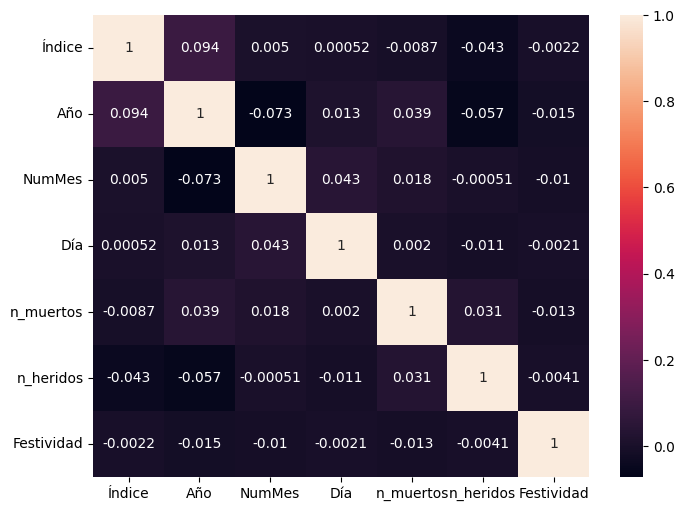

In [68]:
plt.figure(figsize=(8,6))
sns.heatmap(coef, annot=True)
plt.show